A Decision tree: used for classification and regression probs,
is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.

**Root Node:** The first split which decides the entire population or sample data should further get divided into two or more homogeneous sets

**Splitting:** It is a process of dividing a node into two or more sub-nodes

**Decision Node:** This node decides whether/when a sub-node splits into further sub-nodes or not

**Leaf Node:** Terminal Node that predicts the outcome (categorical or continuous value).

**Branch:** A subsection of the entire tree is called branch or sub-tree.

**Parent Node:** A node divided into sub-nodes is called a parent node ofsub-nodes whereas sub-nodes are the child of a parent node.

**steps to implement decision tree:**
1. root node(**S**), contains the whole dataset
2. find the best attribute using Attribute Selection Measure(ASM)
3. divide root node into subsets containing possible values for best att
4. genearte decision tree node containing best attribute
5. recursively make new decison tree using subsets of datasets in step3. continue until you can no longer further classify

In [ ]:
#train model
import sklearn
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
modelDT = dt.fit(x_train,y_train)

#model test
predictionDT = dt.predict(x_test)
print(predictionDT)

#model train accuracy
tractDT= dt.score(x_train,y_train)
trainingaccDT = tractDT*100
print()

#model test accuracy
teacDT = accuracy_score(y_test,predictionDT)
testingaccDT = teacDT*100
print()

Criterion: Determines how the quality of a split is measured.
Options:
Gini – uses Gini impurity.
log_loss or entropy – use Shannon information gain.

Splitter: Decides how splits are chosen at each node. Options:
best – selects the best possible split.
random – selects the best among random splits.


Maximum Depth: Sets how deep the tree can grow. If set to None, the tree keeps splitting until all leaves are pure or have fewer samples than min_samples_split.

In [ ]:
'''#TASK-2
import pandas as pd
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
import matplotlib.pyplot as plt


df = pd.read_csv("/content/task2.csv")

x = df.drop("CLASS (Yes or No)",axis=1)
y = df["CLASS (Yes or No)"]

x = pd.get_dummies(x)
dt= DecisionTreeClassifier(criterion="entropy")
dt.fit(x,y)

tree_rules = export_text(dt, feature_names=list(x.columns))
print(tree_rules)
'''

In [ ]:
# TASK 1

In [ ]:
# TASK 2
import pandas as pd
import numpy as np
from math import log2

df = pd.read_csv("/content/task2.csv")
target = "CLASS (Yes or No)"

def entropy(series):
    probs = series.value_counts(normalize=True)
    return -sum(p * log2(p) for p in probs if p > 0)

total_entropy = entropy(df[target])
print(f"Total Entropy: {total_entropy:.3f}\n")

def information_gain(df, attribute, target):
    total_entropy = entropy(df[target])
    values = df[attribute].unique()

    weighted_entropy = 0
    for val in values:
        subset = df[df[attribute] == val]
        weight = len(subset) / len(df)
        subset_entropy = entropy(subset[target])
        weighted_entropy += weight * subset_entropy

    ig = total_entropy - weighted_entropy
    return ig


attributes = [col for col in df.columns if col not in [target,"ID"]]
ig_results = {}

print("Information Gain for each attribute:\n")
for attr in attributes:
    ig = information_gain(df, attr, target)
    ig_results[attr] = ig
    print(f"{attr}: {ig:.3f}")

best_attr = max(ig_results, key=ig_results.get)
print("\n✅ Best root node (highest IG):", best_attr)


Total Entropy: 0.971

Information Gain for each attribute:

AGE: 0.083
JOB_STATUS: 0.324
OWNS_HOUSE: 0.420
CREDIT_RATING: 0.363

✅ Best root node (highest IG): OWNS_HOUSE


TASK 3

In [28]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
import matplotlib.pyplot as plt

df = pd.read_csv("/content/cancer patient data sets.csv")
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [29]:
df.dtypes

,0
index,int64
Patient Id,object
Age,int64
Gender,int64
Air Pollution,int64
Alcohol use,int64
Dust Allergy,int64
OccuPational Hazards,int64
Genetic Risk,int64
chronic Lung Disease,int64


In [30]:
df['Level'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [32]:
df.shape

(1000, 26)

In [34]:
df.isnull().sum()

,0
index,0
Patient Id,0
Age,0
Gender,0
Air Pollution,0
Alcohol use,0
Dust Allergy,0
OccuPational Hazards,0
Genetic Risk,0
chronic Lung Disease,0


In [33]:
df['Level'].value_counts(normalize=True)

,proportion
Level,
High,0.365
Medium,0.332
Low,0.303


In [35]:
df.select_dtypes(include=['category','object'])

,Patient Id,Level
0,P1,Low
1,P10,Medium
2,P100,High
3,P1000,High
4,P101,High
...,...,...
995,P995,High
996,P996,High
997,P997,High
998,P998,High


In [42]:
df['Level']=df['Level'].astype('category').cat.codes


In [41]:
df.dtypes

,0
index,int64
Patient Id,object
Age,int64
Gender,int64
Air Pollution,int64
Alcohol use,int64
Dust Allergy,int64
OccuPational Hazards,int64
Genetic Risk,int64
chronic Lung Disease,int64


turned level to datatype int so that in future when calculating something or plotting it wouldnt effect

In [43]:
df.duplicated().sum()

np.int64(0)

In [51]:
cor = df.corr(method='pearson',numeric_only=True)

target_corr = cor['Level'].drop('Level')
print("corr with target \n",target_corr.sort_values(ascending=True))

corr with target 
 Passive Smoker             -0.638409
Coughing of Blood          -0.631118
Balanced Diet              -0.618781
Smoking                    -0.611087
Air Pollution              -0.577269
Obesity                    -0.561961
Chest Pain                 -0.494704
Alcohol use                -0.434071
chronic Lung Disease       -0.432405
Genetic Risk               -0.423382
Fatigue                    -0.403276
OccuPational Hazards       -0.363748
Dust Allergy               -0.264926
Dry Cough                  -0.228720
Frequent Cold              -0.171678
Shortness of Breath        -0.140178
index                      -0.024556
Weight Loss                -0.020537
Swallowing Difficulty      -0.012880
Snoring                     0.014280
Age                         0.042631
Gender                      0.086222
Clubbing of Finger Nails    0.116746
Wheezing                    0.167773
Name: Level, dtype: float64


In [53]:
threshold = 0.2
selected_features = target_corr[abs(target_corr) >= threshold].index
print("\nSelected features (|r| >= 0.2):\n", selected_features)



Selected features (|r| >= 0.2):
 Index(['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards',
       'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity',
       'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood',
       'Fatigue', 'Dry Cough'],
      dtype='object')


<Axes: >

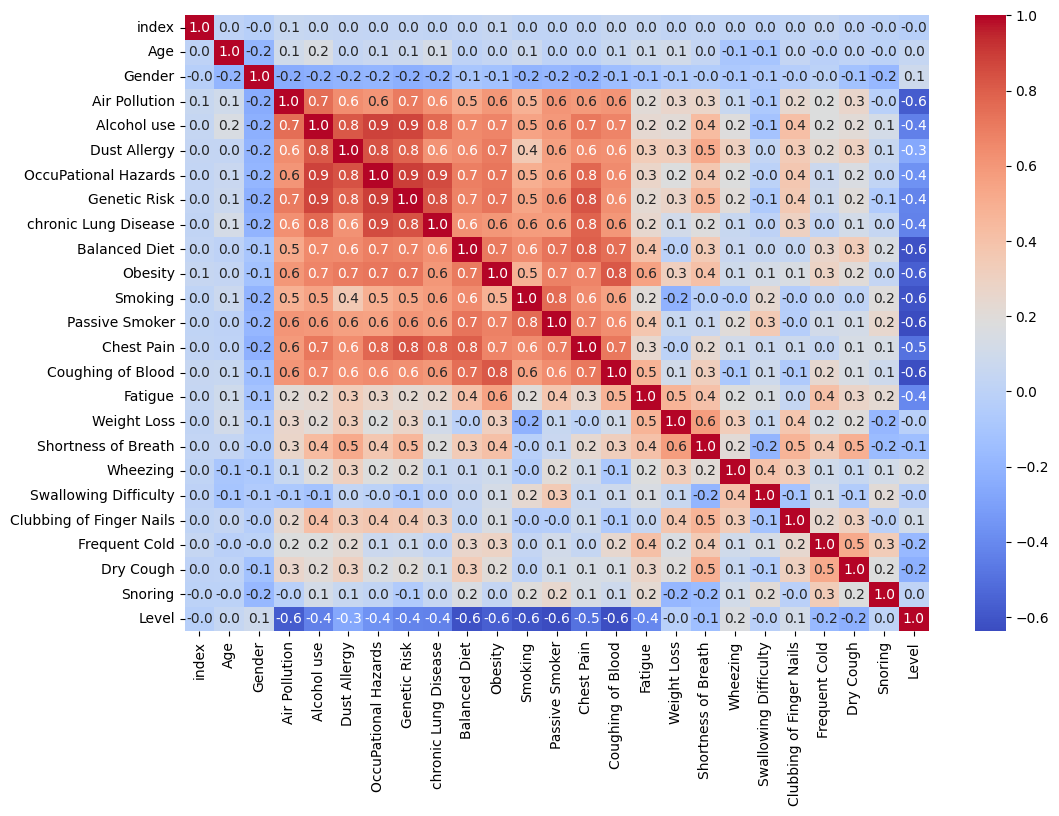

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.heatmap(cor, annot=True, fmt=".1f", cmap="coolwarm", cbar=True)



no scaling required

In [73]:
df = df.drop('Patient Id', axis=1)   # replace 'id' with the actual column name


In [74]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
x = df.drop('Level',axis=1)
y = df['Level']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.3,random_state=0)
print("Train shape:     ", x_train.shape, y_train.shape)
print("Validation shape:", x_val.shape, y_val.shape)
print("Test shape:      ", x_test.shape, y_test.shape)

Train shape:      (560, 24) (560,)
Validation shape: (240, 24) (240,)
Test shape:       (200, 24) (200,)


validation set helps in checking model performance on validation set before testing set , helps us tune the model so maximum accuracy is reached.

In [76]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print(f"training acc: {dt.score(x_train,y_train)*100}")
print(f"testing acc: {accuracy_score(y_test,pred)*100}")

training acc: 100.0
testing acc: 100.0


TASK 4

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("/content/task4.csv - Sheet1.csv")
df.head()


,student,prior experience,course,time,liked
0,1,yes,programming,day,yes
1,2,no,programming,day,no
2,3,yes,history,night,no
3,4,no,programming,night,yes
4,5,yes,english,day,yes


In [7]:
def gini(series):
  probs = series.value_counts(normalize=True)
  return 1-sum(p**2 for p in probs)

def gini_split(df,feature,target):
  total_rows=len(df)
  weight_gini = 0
  for val in df[feature].unique():
    subset = df[df[feature]==val]
    weight = len(subset)/total_rows
    sub_gini = gini(subset[target])
    weight_gini += weight*sub_gini
  return weight_gini

target = 'liked'
features = [col for col in df.columns if col!=target]
gini_score={}
for feature in features:
  score = gini_split(df,feature,target)
  gini_score[feature]=score
  print(f"{feature} weighted gini: ",score)

best_feature = min(gini_score,key=gini_score.get)
print("\nbest feature: ",best_feature)


student weighted gini:  0.0
prior experience weighted gini:  0.4761904761904763
course weighted gini:  0.3428571428571429
time weighted gini:  0.48

best feature:  student
